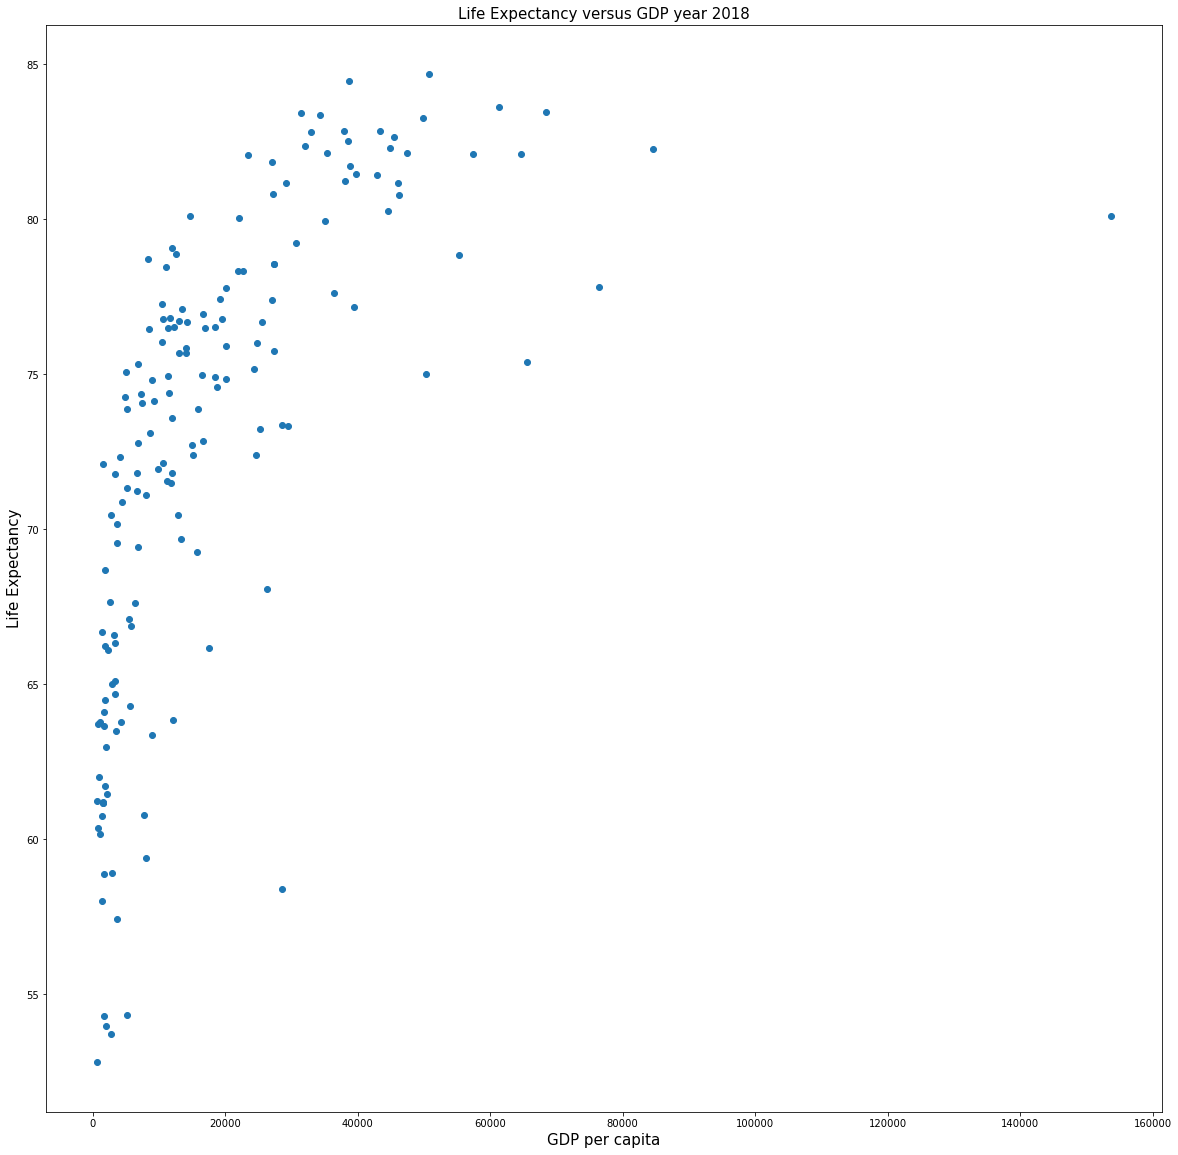

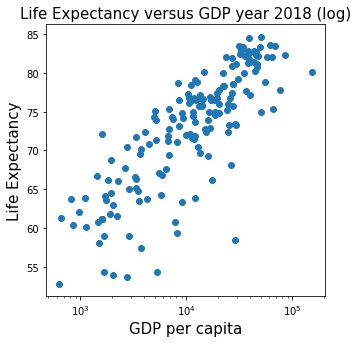

In [28]:
import pandas as pd
import matplotlib.pyplot as plt         

## 1a)
## Read in the datafile
df0 = pd.read_csv("life-expectancy-vs-gdp-per-capita.csv")

## Using only year 2018 the scatterplott becomes clearer 
df2018 = df0.loc[df0['Year'] == 2018]

#Since data without GDP per capita and Life expectancy are irrelevant they are removed
df2018 = df2018.dropna(subset=['GDP per capita', 'Life expectancy'])

#145446 Contienent data were for the most part null and therefore hard to utilize in the scatterplot
del df2018['145446-annotations'], df2018['Continent']

plt.scatter(df2018['GDP per capita'], df2018['Life expectancy'])

fs = 15
plt.title("Life Expectancy versus GDP year 2018", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = fs)
plt.ylabel("Life Expectancy", fontsize = fs)

plt.rcParams["figure.figsize"]=5,5
plt.show()

plt.title("Life Expectancy versus GDP year 2018 (log)", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = fs)
plt.ylabel("Life Expectancy", fontsize = fs)

plt.scatter(df2018['GDP per capita'], df2018['Life expectancy'])

#Using a log-scale the correlation between GDP per capita and Life expectancy becomes clearer
plt.xscale("log")

plt.rcParams["figure.figsize"]=5,5
plt.show()

## **1b)
As shown by first scatterplot above there exist some correlation between life expectancy and GDP per capita. This is further supported by the scatterplot using a log-scale which then shows a linear line

Hence, it would be resonable to conclude that there is some correlation between life expectancy and GDP per capita. However whether its is causational or not its harder to determine. Firstly you can not say if a longer life expectancy leads to more acumulated knowledge with results in a higher GDP per capita or if a higher GDP per capita leads to better healthcare and nutrition which leads to higher life expectancy. Furthermore ther could be other factors at play that both GDP per capita and Life expectancy have a causational effect with.

Hence, the only conclusion to be drawn is that GDP have a correlation with Life expectancy, but how strong it is and wheather its causational or not can not be determined from these scatterplots on their own.

1c)
The biggest data cleaning we did was to remove every year execpt for 2018. There was several factors to this. Firstly, there were to many points to be analysed by a simple scatterplot, secondly only the later years tended to have all the neccecary data, and thirdly it becomes more relevant if you were to draw conclusion between countries the year is as close to present as possible, and lastly whether we like it or not we subconsilosly draw conclusion based on the technology and standards that we have at present. Therefore if one were to use older data you would have to be more carfule when makeing statments since other factors unaware to one could exist. This could however also be said for the present however we belive that is is less.



In [29]:
# d)

df1 = df2018.describe()
mean = df1.loc['mean']['Life expectancy']
std = df1.loc['std']['Life expectancy']


df2 = df2018.loc[df2018['Life expectancy'] > mean + std]
df2 = df2.sort_values(by= 'Life expectancy', ascending = False)

df2[['Entity','Life expectancy',]]

,Entity,Life expectancy
19020,Hong Kong,84.68700
22030,Japan,84.47000
44307,Switzerland,83.63000
40617,Singapore,83.45800
42608,Spain,83.43300
21158,Italy,83.35200
2395,Australia,83.28100
19572,Iceland,82.85500
42111,South Korea,82.84600
20859,Israel,82.81900


In [30]:
# e)
df2018['GDP'] = df2018['GDP per capita'] * df2018['Total population (Gapminder, HYDE & UN)']


lifeexpect = df1.loc['50%']['Life expectancy']
df1 = df2018.describe()
mediangdp = df1.loc['50%']['GDP']
meangdp = df1.loc['mean']['GDP']


df3 = df2018.loc[(df2018['Life expectancy'] > lifeexpect) & (df2018['GDP'] < mediangdp)]
df4 = df2018.loc[(df2018['Life expectancy'] > lifeexpect) & (df2018['GDP'] < meangdp)] 

# If you prefer the median as an average
df3[['Entity','Life expectancy', 'GDP']].sort_values(by='Life expectancy', ascending= False)
# If you prefer the mean as an average
df4[['Entity','Life expectancy', 'GDP']].sort_values(by='Life expectancy', ascending= False)

,Entity,Life expectancy,GDP
19020,Hong Kong,84.68700,374787835640.00000
44307,Switzerland,83.63000,523263895980.00000
40617,Singapore,83.45800,393860731300.00006
2395,Australia,83.28100,1240687258400.00000
19572,Iceland,82.85500,14638787980.00000
...,...,...,...
6335,Bulgaria,74.92800,130068921519.99998
27640,Mauritius,74.86300,25515568190.00000
11809,Dominica,74.80600,649524240.00000
3907,Belarus,74.59000,177029355960.00000


In [37]:
# f)

df5 = df2018.loc[(df2018['Life expectancy'] < lifeexpect) & (df2018['GDP'] > mediangdp)]
df6 = df2018.loc[(df2018['Life expectancy'] < lifeexpect) & (df2018['GDP'] > meangdp)]

# If you prefer the median as an average
df5[['Entity','Life expectancy','GDP']].sort_values(by='Life expectancy', ascending=False)
# If you prefer the mean as an average
#df6[['Life expectancy','GDP']]

,Entity,Life expectancy,GDP
17701,Guatemala,74.06300,127671593280.00000
12032,Dominican Republic,73.89200,169101074800.00000
22469,Kazakhstan,73.23600,463634499200.00000
2804,Azerbaijan,72.86400,165449197000.00000
50704,World,72.38600,116087364392704.00000
37499,Russia,72.38600,3595098929940.00000
3470,Bangladesh,72.32000,661524634456.00000
50077,Venezuela,72.12800,309378325650.00000
47701,Ukraine,71.95300,434201926560.00000
12533,Egypt,71.82500,1176876437040.00000


In [39]:
# g)

mediangdppercapita = df1.loc['50%']['GDP per capita']
meangdppercapita = df1.loc['mean']['GDP per capita']

df7 = df2018.loc[(df2018['Life expectancy'] < lifeexpect) & (df2018['GDP per capita'] > mediangdppercapita)].sort_values(by='GDP per capita')
df8 = df2018.loc[(df2018['Life expectancy'] < lifeexpect) & (df2018['GDP per capita'] > meangdppercapita)].sort_values(by='GDP per capita')

df7
#df8

,Entity,Code,Year,Life expectancy,GDP per capita,"Total population (Gapminder, HYDE & UN)",GDP
20345,Iraq,IRQ,2018,70.45400,12835.81000,38434000.00000,493331521540.00000
29031,Mongolia,MNG,2018,69.68900,13382.54000,3170000.00000,42422651800.00000
24855,Libya,LBY,2018,72.72400,15013.31000,6679000.00000,100273897490.00000
50704,World,OWID_WRL,2018,72.38600,15212.42000,7631091200.00000,116087364392704.00000
5593,Botswana,BWA,2018,69.27500,15842.13000,2254000.00000,35708161020.00000
12032,Dominican Republic,DOM,2018,73.89200,15912.40000,10627000.00000,169101074800.00000
2804,Azerbaijan,AZE,2018,72.86400,16628.06000,9950000.00000,165449197000.00000
15869,Gabon,GAB,2018,66.18700,17613.56000,2119000.00000,37323133640.00000
37499,Russia,RUS,2018,72.38600,24668.91000,145734000.00000,3595098929940.00000
22469,Kazakhstan,KAZ,2018,73.23600,25307.56000,18320000.00000,463634499200.00000


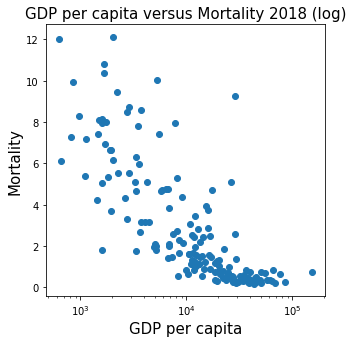

In [33]:
df00 = pd.read_csv('child-mortality-around-the-world.csv')
df00 = df00.loc[df00['Year'] == 2018]

df01 = pd.read_csv('life-expectancy-vs-gdp-per-capita.csv')
df01 = df01.loc[df01['Year'] == 2018]

df02 = df00.merge(df01)
df02.rename(columns={'Estimates, 1950 - 2020: Annually interpolated demographic indicators - Under-five mortality (deaths under age 5 per 1,000 live births)':'Mortality'}, inplace=True)

plt.title("GDP per capita versus Mortality 2018 (log)", fontsize = fs)
plt.xlabel("GDP per capita", fontsize = fs)
plt.ylabel("Mortality", fontsize = fs)
plt.xscale('log')

plt.scatter(df02['GDP per capita'], df02['Mortality'])


plt.show()

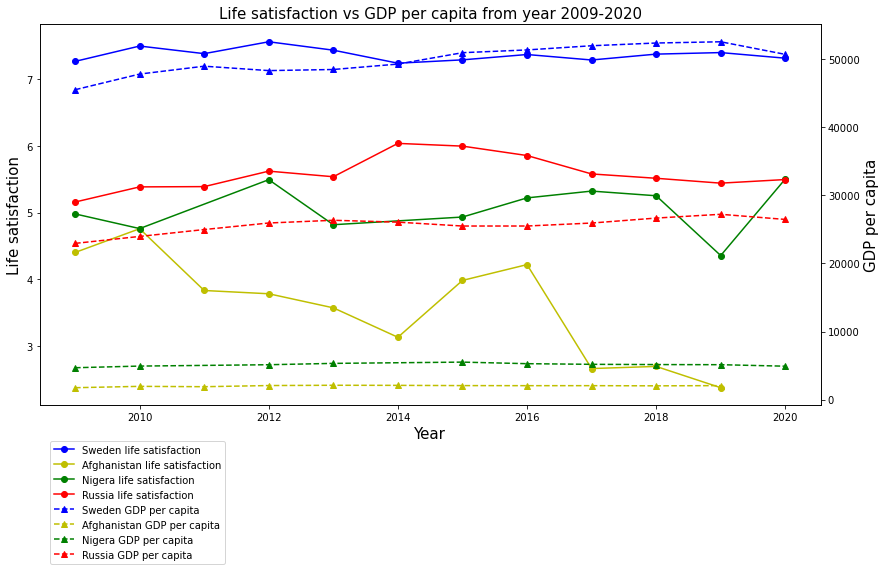

In [34]:
df03 = pd.read_csv('gdp-vs-happiness.csv')
df03 = df03.loc[df03['Year'] > 2008]
df03 = df03.dropna(subset=['Life satisfaction in Cantril Ladder (World Happiness Report 2021)', 'GDP per capita, PPP (constant 2017 international $)'])

dfswe = df03.loc[df03['Entity'] == 'Sweden']
dfswe_happy = dfswe['Life satisfaction in Cantril Ladder (World Happiness Report 2021)']
dfswe_gdp = dfswe['GDP per capita, PPP (constant 2017 international $)']
dfswe_year = dfswe['Year']

dfafg = df03.loc[df03['Entity'] == 'Afghanistan']
dfafg_happy = dfafg['Life satisfaction in Cantril Ladder (World Happiness Report 2021)']
dfafg_gdp = dfafg['GDP per capita, PPP (constant 2017 international $)']
dfafg_year = dfafg['Year']

dfnig = df03.loc[df03['Entity'] == 'Nigeria']
dfnig_happy = dfnig['Life satisfaction in Cantril Ladder (World Happiness Report 2021)']
dfnig_gdp = dfnig['GDP per capita, PPP (constant 2017 international $)']
dfnig_year = dfnig['Year']

dfrus = df03.loc[df03['Entity'] == 'Russia']
dfrus_happy = dfrus['Life satisfaction in Cantril Ladder (World Happiness Report 2021)']
dfrus_gdp = dfrus['GDP per capita, PPP (constant 2017 international $)']
dfrus_year = dfrus['Year']

fig, ax = plt.subplots(figsize=(14,7))

ax1 = ax.twinx()
axswe = ax.plot(dfswe_year, dfswe_happy, linestyle='-', marker='o', color='b', label='Sweden life satisfaction')
axswe1 = ax1.plot(dfswe_year, dfswe_gdp, linestyle='--', marker='^', color='b', label='Sweden GDP per capita')

axafg = ax.plot(dfafg_year,dfafg_happy, linestyle='-', marker='o', color='y', label='Afghanistan life satisfaction')
axafg1 = ax1.plot(dfafg_year,dfafg_gdp, linestyle='--', marker='^', color='y', label='Afghanistan GDP per capita')

axnig = ax.plot(dfnig_year, dfnig_happy, linestyle='-', marker='o', color='g', label='Nigera life satisfaction')
axnig1 = ax1.plot(dfnig_year, dfnig_gdp, linestyle='--', marker='^', color='g', label='Nigera GDP per capita')

axrus = ax.plot(dfrus_year, dfrus_happy, linestyle='-', marker='o', color='r', label='Russia life satisfaction')
axrus1 = ax1.plot(dfrus_year, dfrus_gdp, linestyle='--', marker='^', color='r', label='Russia GDP per capita')

plt.title("Life satisfaction vs GDP per capita from year 2009-2020", fontsize = fs)
ax.set_xlabel("Year", fontsize = fs)
ax.set_ylabel("Life satisfaction", fontsize = fs)
ax1.set_ylabel("GDP per capita", fontsize = fs)
plt.rcParams["figure.figsize"]=20,20

fig.legend(loc='lower left', bbox_to_anchor=(0.13,-0.2))